In [3]:
#yamira
import pandas as pd

df = pd.read_csv("imdb_movies.csv")
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [5]:
#yamira
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("imdb_movies.csv")

def clean_data(data):
    # Handle missing values
    data = data.dropna(subset=['budget_x', 'revenue'])

    # Remove duplicates
    data = data.drop_duplicates()

    # Ensure numeric types
    data['budget_x'] = data['budget_x'].astype(float)
    data['revenue'] = data['revenue'].astype(float)

    return data

# Clean the data
cleaned_data = clean_data(data)

print(cleaned_data.head())

                         names       date_x  score  \
0                    Creed III  03/02/2023    73.0   
1     Avatar: The Way of Water  12/15/2022    78.0   
2  The Super Mario Bros. Movie  04/05/2023    76.0   
3                      Mummies  01/05/2023    70.0   
4                    Supercell  03/17/2023    61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                         

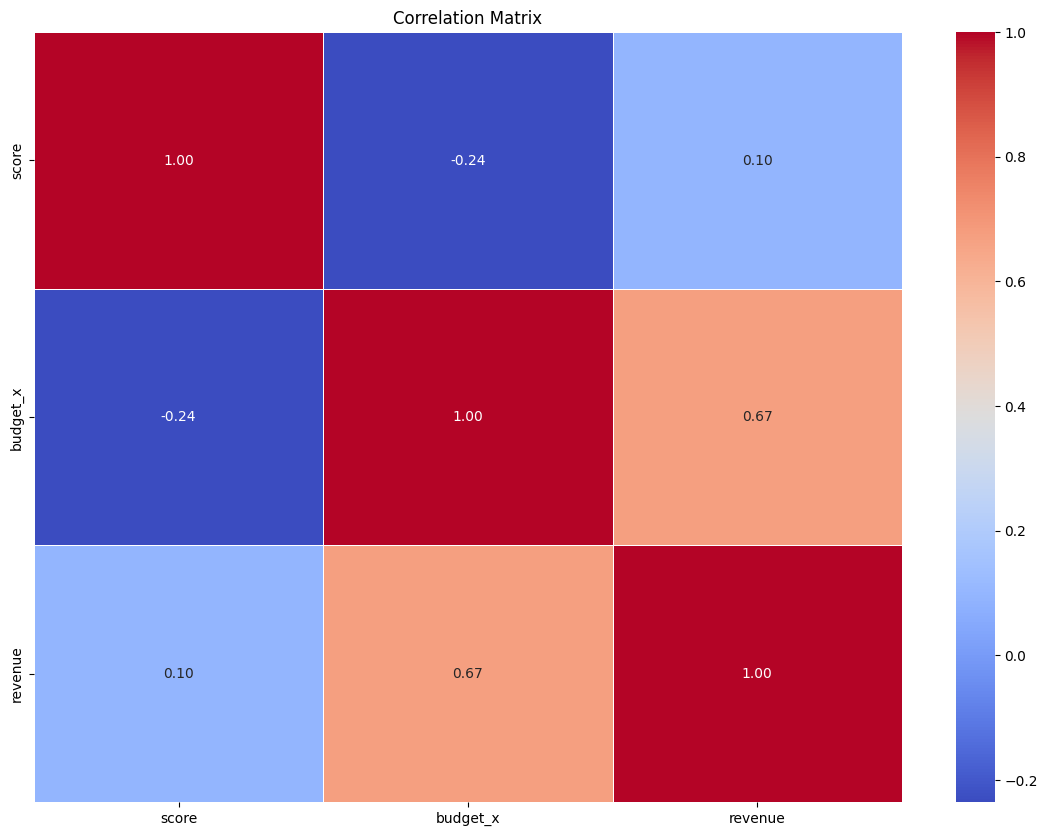

Selected features based on correlation analysis: ['budget_x']


In [6]:
#yamira
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_analysis(data):

    # Select numeric columns
    numeric_data = data.select_dtypes(include=[np.number])

    # Compute correlation matrix
    correlation_matrix = numeric_data.corr()

    # Plot heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        linewidths=0.5
    )
    plt.title("Correlation Matrix")
    plt.show()

    # Feature selection based on correlation with revenue
    correlation_threshold = 0.1

    if 'revenue' not in correlation_matrix.columns:
        raise ValueError("'revenue' column not found or not numeric")

    target_correlation = correlation_matrix['revenue'].abs()

    relevant_features = target_correlation[
        target_correlation > correlation_threshold
    ].index.tolist()

    # Remove target itself
    relevant_features = [f for f in relevant_features if f != 'revenue']

    return relevant_features

# Perform correlation analysis
selected_features = correlation_analysis(cleaned_data)
print("Selected features based on correlation analysis:", selected_features)


In [7]:
#yamira
import pandas as pd

def engineer_features(data):

    # Work on a copy to avoid chained assignment issues
    data = data.copy()

    # -------- Crew size feature --------
    if 'crew' not in data.columns:
        raise ValueError("'crew' column not found in dataset")

    def calculate_crew_size(crew):
        if pd.notnull(crew):
            return len(str(crew).split(','))
        return 0

    data['crew_size'] = data['crew'].apply(calculate_crew_size)

    # Debug check
    print(data[['crew', 'crew_size']].head())

    # -------- Genre processing --------
    if 'genre' not in data.columns:
        raise ValueError("'genre' column not found in dataset")

    data['genre_list'] = data['genre'].apply(
        lambda x: [g.strip().lower() for g in str(x).split(',')]
        if pd.notnull(x) else []
    )

    # One-hot encode genres
    genres = sorted(set(g for sublist in data['genre_list'] for g in sublist))

    for genre in genres:
        data[f'genre_{genre}'] = data['genre_list'].apply(
            lambda x: int(genre in x)
        )

    # Drop helper column
    data = data.drop(columns=['genre_list'])

    return data

# Engineer features
engineered_data = engineer_features(cleaned_data)
print(engineered_data.head())

                                                crew  crew_size
0  Michael B. Jordan, Adonis Creed, Tessa Thompso...         18
1  Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...         18
2  Chris Pratt, Mario (voice), Anya Taylor-Joy, P...         18
3  Óscar Barberán, Thut (voice), Ana Esther Albor...         18
4  Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...         18
                         names       date_x  score  \
0                    Creed III  03/02/2023    73.0   
1     Avatar: The Way of Water  12/15/2022    78.0   
2  The Super Mario Bros. Movie  04/05/2023    76.0   
3                      Mummies  01/05/2023    70.0   
4                    Supercell  03/17/2023    61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                              

In [8]:
#yamira
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

def train_model(data, selected_features):

    # Base features
    extra_features = ['crew_size', 'score']

    # Remove duplicates safely
    feature_columns = list(set(selected_features + extra_features))

    print("Initial feature columns:", feature_columns)

    # Check column existence
    missing_cols = [col for col in feature_columns if col not in data.columns]
    if missing_cols:
        raise ValueError(f"Missing feature columns: {missing_cols}")

    # Target check
    if 'revenue' not in data.columns:
        raise ValueError("'revenue' column not found in dataset")

    # Select features
    X = data[feature_columns]
    y = data['revenue']

    # Ensure all features are numeric
    if not all(np.issubdtype(dtype, np.number) for dtype in X.dtypes):
        raise ValueError("All features must be numeric for Linear Regression")

    print("X shape:", X.shape)
    print("y shape:", y.shape)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    print("Model trained successfully")

    return model, X_test, y_test

# Train the model
model, X_test, y_test = train_model(engineered_data, selected_features)

Initial feature columns: ['score', 'crew_size', 'budget_x']
X shape: (10178, 3)
y shape: (10178,)
X_train shape: (8142, 3)
X_test shape: (2036, 3)
Model trained successfully


In [9]:
#yamira
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):

    # Safety checks
    if X_test.shape[0] != len(y_test):
        raise ValueError("X_test and y_test have mismatched lengths")

    # Predict
    y_pred = model.predict(X_test)

    # Ensure 1D arrays
    y_test = np.ravel(y_test)
    y_pred = np.ravel(y_pred)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        "Mean Squared Error": mse,
        "R-squared": r2
    }

# Evaluate the model
evaluation_metrics = evaluate_model(model, X_test, y_test)
print(evaluation_metrics)

{'Mean Squared Error': 3.680371118610737e+16, 'R-squared': 0.5206197548663127}


In [10]:
#yamira
import pandas as pd

def predict_future_revenue(model, new_data, features):

    # Work on a copy
    new_data = new_data.copy()

    # Ensure all required feature columns exist
    for col in features:
        if col not in new_data.columns:
            new_data[col] = 0   # numeric, not False

    # Select features in correct order
    X_new = new_data[features]

    # Predict
    new_data['predicted_revenue'] = model.predict(X_new)

    return new_data


# -------- Example new movies data --------
new_movies = pd.DataFrame({
    'names': ['New Movie 1', 'New Movie 2'],
    'date_x': ['01-01-2024', '02-15-2024'],
    'score': [85, 90],
    'genre': ['Drama, Action', 'Science Fiction, Adventure, Action'],
    'overview': ['...', '...'],
    'crew': ['Person A, Person B', 'Person C, Person D, Person E'],
    'orig_title': ['New Movie 1', 'New Movie 2'],
    'status': ['Released', 'Released'],
    'orig_lang': ['English', 'English'],
    'budget_x': [150000000, 200000000],
    'revenue': [None, None]
})

# Apply the same feature engineering as training
new_movies_engineered = engineer_features(new_movies)

# Use EXACT same features as training
feature_columns = list(set(selected_features + ['crew_size', 'score']))

# Predict revenue
new_movies_with_predictions = predict_future_revenue(
    model,
    new_movies_engineered,
    feature_columns
)

# Display results
print(
    new_movies_with_predictions[
        ['names', 'budget_x', 'score', 'predicted_revenue']
    ]
)

                           crew  crew_size
0            Person A, Person B          2
1  Person C, Person D, Person E          3
         names   budget_x  score  predicted_revenue
0  New Movie 1  150000000     85       8.413419e+08
1  New Movie 2  200000000     90       1.036980e+09


In [11]:
#yamira
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def build_and_evaluate_regression_model(data, selected_features):

    # Work on a copy
    data = data.copy()

    # Ensure required columns exist
    base_features = ['crew_size']
    feature_columns = list(set(selected_features + base_features))

    missing_cols = [c for c in feature_columns if c not in data.columns]
    if missing_cols:
        raise ValueError(f"Missing feature columns: {missing_cols}")

    if 'revenue' not in data.columns:
        raise ValueError("'revenue' column not found in dataset")

    # Select predictors and target
    X = data[feature_columns]
    y = data['revenue']

    # Ensure numeric data only
    X = X.apply(pd.to_numeric, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')

    # Drop rows with missing values caused by coercion
    valid_idx = X.notnull().all(axis=1) & y.notnull()
    X = X.loc[valid_idx]
    y = y.loc[valid_idx]

    # Add constant term
    X = sm.add_constant(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Fit OLS model
    model = sm.OLS(y_train, X_train).fit()

    # Summary
    print(model.summary())

    # Evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("R-squared value:", r2)

    return model

# Build and evaluate the regression model
regression_model = build_and_evaluate_regression_model(
    engineered_data, selected_features
)

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     3367.
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:49:14   Log-Likelihood:            -1.6740e+05
No. Observations:                8142   AIC:                         3.348e+05
Df Residuals:                    8139   BIC:                         3.348e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.028e+08   1.48e+07      6.971      0.0

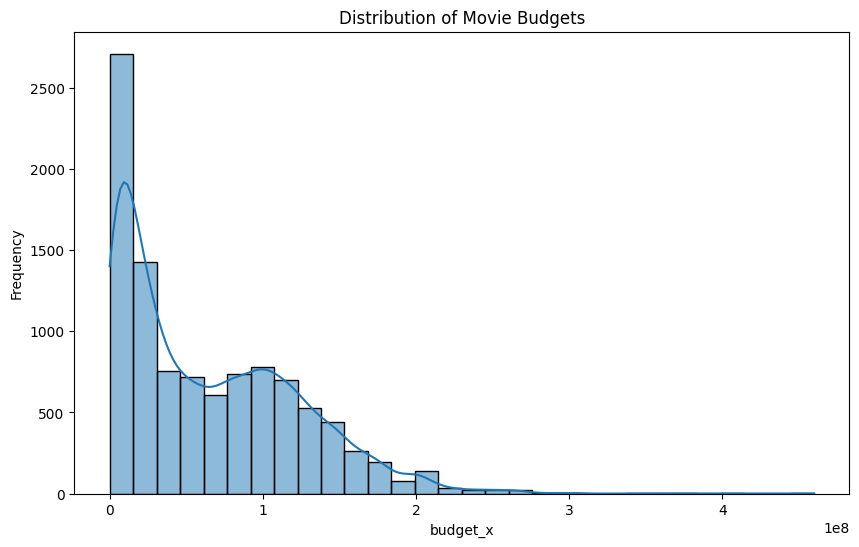

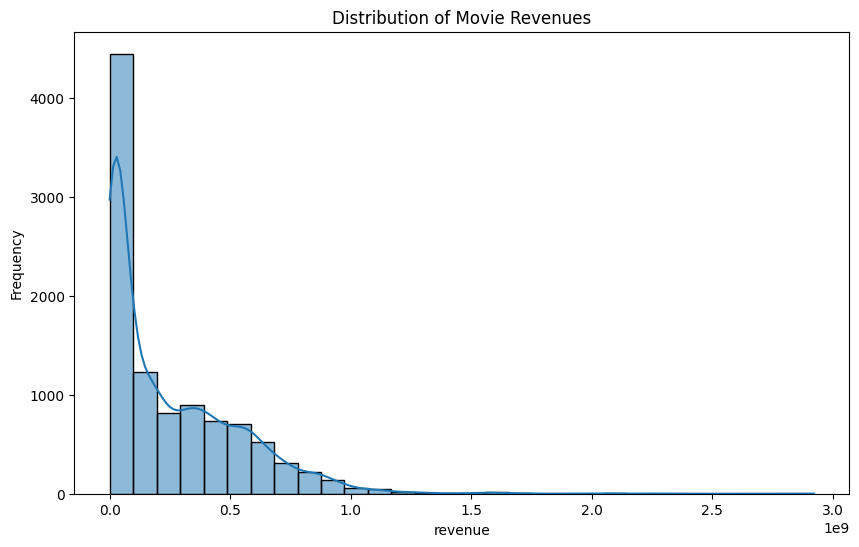

In [12]:
#yamira
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(data, column, title):

    # Column existence check
    if column not in data.columns:
        raise ValueError(f"Column '{column}' not found in dataset")

    # Convert to numeric and drop missing values
    values = pd.to_numeric(data[column], errors='coerce').dropna()

    if values.empty:
        raise ValueError(f"No numeric data available to plot for column '{column}'")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.histplot(values, bins=30, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Example usage
plot_distribution(engineered_data, 'budget_x', 'Distribution of Movie Budgets')
plot_distribution(engineered_data, 'revenue', 'Distribution of Movie Revenues')

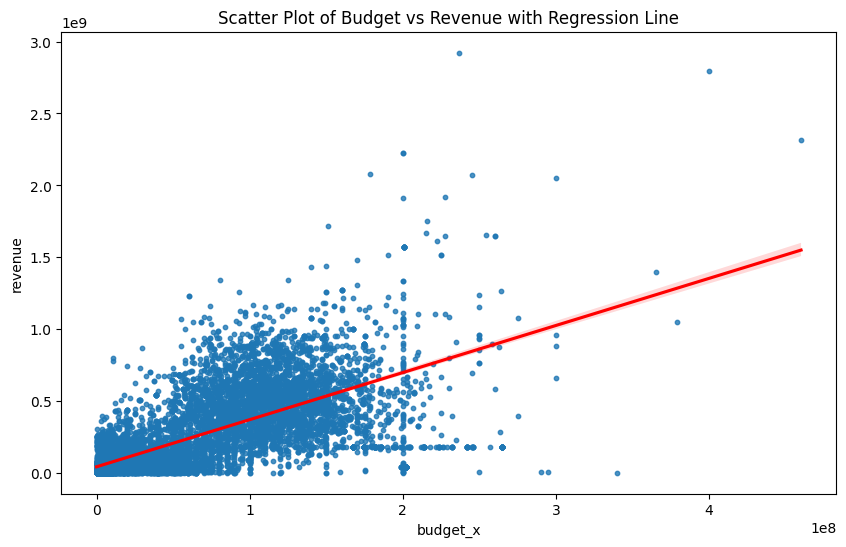

In [13]:
#yamira
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(data, x, y, title):

    # Column existence check
    if x not in data.columns or y not in data.columns:
        raise ValueError(f"Columns '{x}' and/or '{y}' not found in dataset")

    # Convert to numeric and drop invalid rows
    plot_data = data[[x, y]].apply(pd.to_numeric, errors='coerce').dropna()

    if plot_data.empty:
        raise ValueError(f"No valid numeric data available to plot '{x}' vs '{y}'")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=x,
        y=y,
        data=plot_data,
        scatter_kws={'s': 10},
        line_kws={'color': 'red'}
    )
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


# Example usage
plot_scatter(
    engineered_data,
    'budget_x',
    'revenue',
    'Scatter Plot of Budget vs Revenue with Regression Line'
)

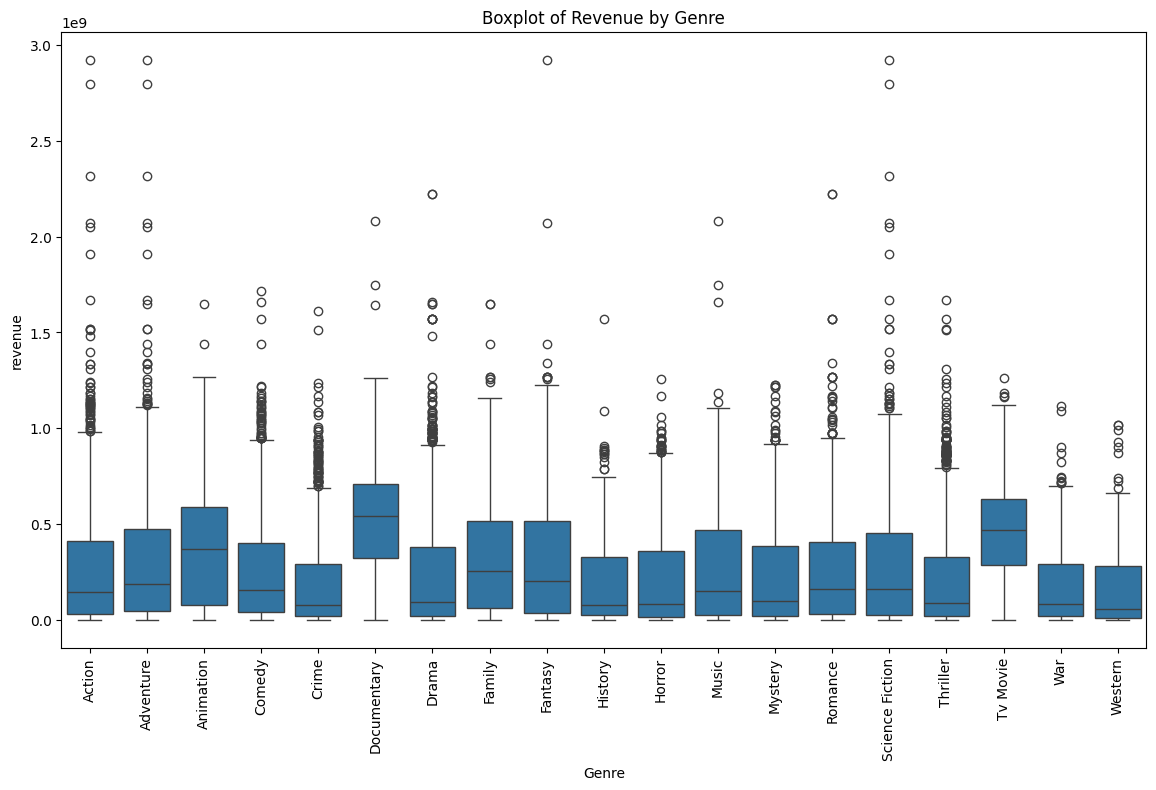

In [15]:
#yamira
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(data, x, y, title):

    # Check target column
    if y not in data.columns:
        raise ValueError(f"Column '{y}' not found in dataset")

    # Identify genre columns
    genre_cols = [col for col in data.columns if col.startswith('genre_')]
    if not genre_cols:
        raise ValueError("No genre columns found (expected columns starting with 'genre_')")

    # Melt genre columns
    melted_data = data.melt(
        id_vars=[y],
        value_vars=genre_cols,
        var_name=x,
        value_name='Value'
    )

    # Keep rows where genre is present
    melted_data = melted_data[melted_data['Value'] == 1]

    # Convert revenue to numeric and drop invalid rows
    melted_data[y] = pd.to_numeric(melted_data[y], errors='coerce')
    melted_data = melted_data.dropna(subset=[y])

    if melted_data.empty:
        raise ValueError("No valid data available to plot boxplot")

    # Clean genre labels
    melted_data[x] = melted_data[x].str.replace('genre_', '', regex=False).str.title()

    # Plot
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=x, y=y, data=melted_data)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=90)
    plt.show()


# Example usage
plot_boxplot(
    engineered_data,
    'Genre',
    'revenue',
    'Boxplot of Revenue by Genre'
)


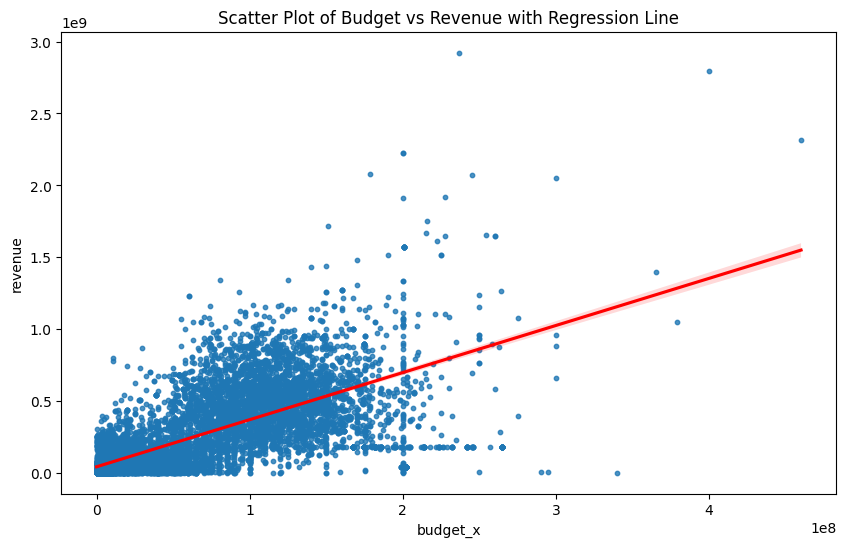

In [16]:
#yamira
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(data, x, y, title):

    # Check columns exist
    if x not in data.columns or y not in data.columns:
        raise ValueError(f"Columns '{x}' or '{y}' not found in dataset")

    # Convert to numeric and remove invalid rows
    plot_data = data[[x, y]].apply(pd.to_numeric, errors='coerce').dropna()

    if plot_data.empty:
        raise ValueError(f"No valid numeric data to plot for '{x}' vs '{y}'")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=x,
        y=y,
        data=plot_data,
        scatter_kws={'s': 10},
        line_kws={'color': 'red'}
    )
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


# Example usage
plot_scatter(
    engineered_data,
    'budget_x',
    'revenue',
    'Scatter Plot of Budget vs Revenue with Regression Line'
)